<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/1229.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#create dataset
df = pd.DataFrame({'hours': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'score': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
      

#view first six rows of dataset
df[0:6]

,hours,score
0,1,64
1,2,66
2,4,76
3,5,73
4,5,74
5,6,81


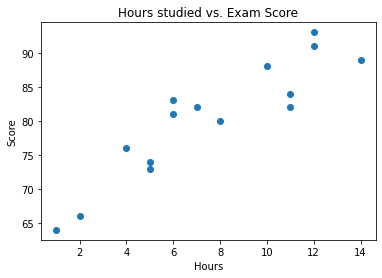

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df.hours, df.score)
plt.title('Hours studied vs. Exam Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

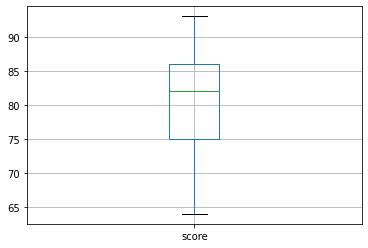

In [3]:
df.boxplot(column=['score'])

In [4]:
import statsmodels.api as sm

#define response variable
y = df['score']

#define explanatory variable
x = df[['hours']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           2.25e-06
Time:                        07:28:03   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


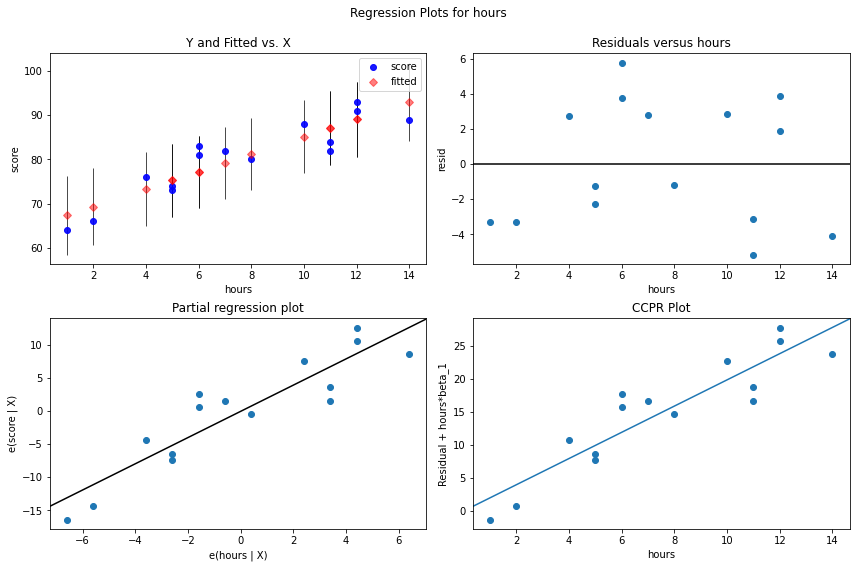

In [5]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(model, 'hours', fig=fig)

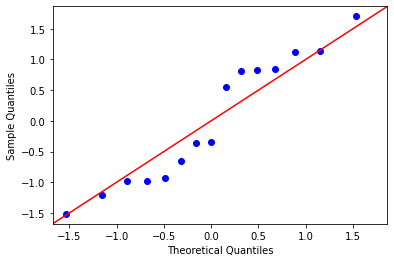

In [6]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show() 

In [11]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

def simple_linear_regress(raw_x,raw_y):
  n = np.size(raw_x)
  x = np.array(raw_x)
  y = np.array(raw_y)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  num1 = np.sum(y*x) - n*y_mean*x_mean
  num2 = np.sum(x*x) - n*x_mean*x_mean
  b_1 = num1 / num2
  b_0 = y_mean - b_1 * x_mean
  return (b_0,b_1)

  rawData = load_boston()
  bostonDataset = pandas.DataFrame(rawData.data,columns=rawData.feature_names)
  bostonDataset['MEDV'] = rawData.target

  x = np.array(bostonDataset['LSTAT'])[:,np.newaxis]
  y = np.array(bostonDataset['MEDV'])[:,np.newaxis]

  b0,b1 = simple_linear_regress(x,y)
  bf1_x = x
  bf1_y = b0 + b1 *bf1_x

ValueError: ignored

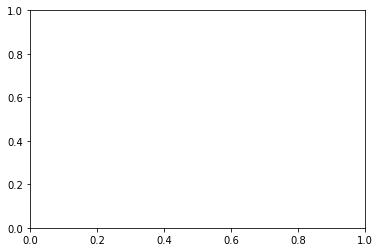

In [16]:
plt.scatter(x,y)
plt.plot(bf1_x,bf1_y,color = "r")

ValueError: ignored

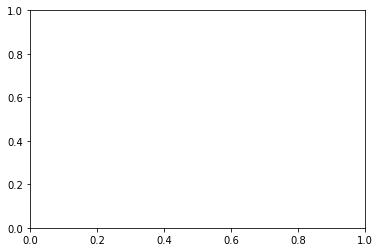

In [15]:
plt.scatter(x,y)
plt.plot(bf1_x,bf1_y,color = "r")

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.show()
print('The intercept of the best fitting line is',b0)
print('The slope of the best fitting line is',b1)